# Import relevant libraries

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Load and clean data

In [2]:
# Load the dataset from CSV
df = pd.read_csv('advertising.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Check for outliers and handle them if necessary
def detect_outliers(df, features):
    outlier_indices = []
    
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = pd.Series(outlier_indices)
    return outlier_indices

outlier_indices = detect_outliers(df, ['TV', 'Radio', 'Newspaper', 'Sales'])
print("\nNumber of outliers detected:", len(outlier_indices))

# Drop outliers
df = df.drop(outlier_indices).reset_index(drop=True)

# Check for data types and convert them if necessary (e.g., converting object type to numeric)

# Further data cleaning steps as needed


First few rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Missing values in the dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Number of duplicate rows:
0

Number of outliers detected: 2


# 2.Data exploration 


Summary statistics of numerical features:
               TV       Radio   Newspaper       Sales
count  198.000000  198.000000  198.000000  198.000000
mean   146.688384   23.130808   29.777273   15.100000
std     85.443221   14.862111   20.446303    5.271184
min      0.700000    0.000000    0.300000    1.600000
25%     74.800000    9.925000   12.650000   11.000000
50%    149.750000   22.400000   25.600000   16.000000
75%    218.475000   36.325000   44.050000   18.975000
max    293.600000   49.600000   89.400000   27.000000


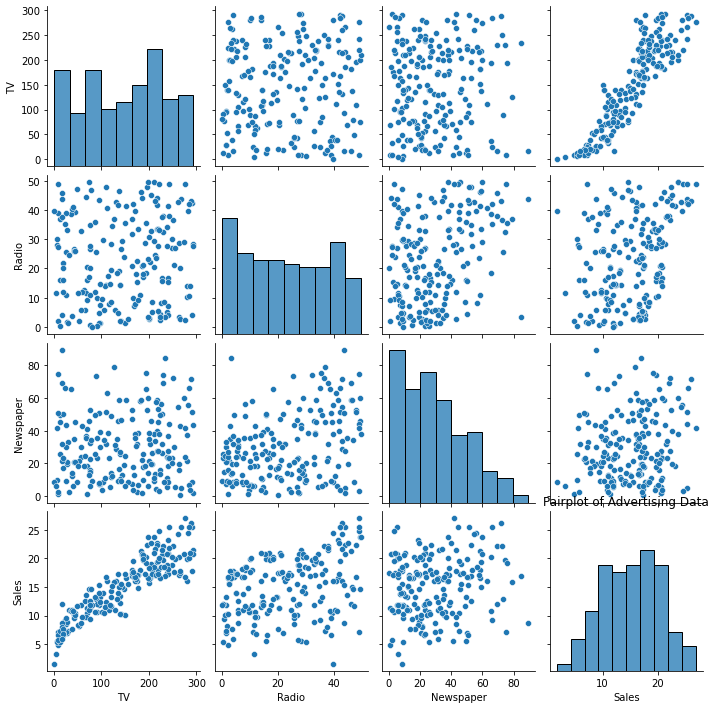

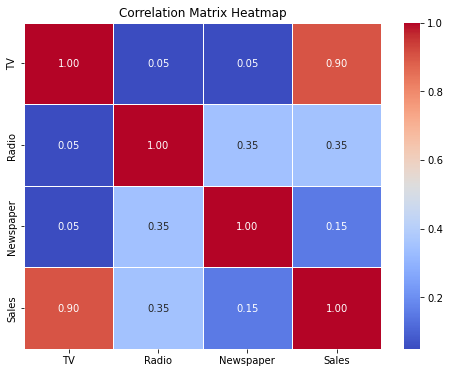

In [6]:
# Summary statistics of numerical features
print("\nSummary statistics of numerical features:")
print(df.describe())

# Pairplot to visualize relationships between numerical features
sns.pairplot(df)
plt.title('Pairplot of Advertising Data')
plt.show()

# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3.Split the data 

In [7]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.Train the model 

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 5.Evaluate the model

In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.415728945593508
R-squared: 0.9130003152798273


## Evaluation Results

After training and testing the machine learning model for sales prediction, I evaluated its performance using the following evaluation metrics:

### Mean Squared Error (MSE)

The Mean Squared Error (MSE) measures the average squared difference between the predicted values and the actual values. A lower MSE indicates that the model's predictions are closer to the actual values, which is desirable. In our case, the MSE was calculated to be 2.416.

### R-squared (R²)

The R-squared value, also known as the coefficient of determination, measures the proportion of the variance in the target variable (sales) that is explained by the independent variables (TV, radio, newspaper advertising expenditures) in the model. R-squared ranges from 0 to 1, where 1 indicates a perfect fit. In our case, the R-squared value was calculated to be 0.913, indicating that approximately 91.3% of the variance in toy sales is explained by the advertising expenditures included in the model.

These evaluation metrics provide insights into how well the model performs in predicting sales based on advertising expenditures. A lower MSE and a higher R-squared value suggest that the model has better predictive performance.

It's important to note that while these evaluation metrics provide valuable information, they should be interpreted in conjunction with other factors such as domain knowledge and business context to assess the overall effectiveness of the model.
